In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from xgboost import XGBRegressor

In [15]:
# AQS Data
filename = "LA_AQS_2023.csv" 
pd.read_csv(filename)
df = pd.read_csv(filename) 

# O3
df_o3 = df[(df['Parameter Name']== 'Ozone') & (df['Duration Description']== '1 HOUR')]
o3value = df_o3['Arithmetic Mean'] * 1000 #ppb
o3date = df_o3['Date (Local)']
df_1 = pd.DataFrame(data = {'Ozone':o3value, 'date': o3date})

# NO2
df_no2 = df[(df['Parameter Name']== 'Nitrogen dioxide (NO2)') & (df['Duration Description']== '1 HOUR')]
no2value = df_no2['Arithmetic Mean'] # ppb
no2date = df_no2['Date (Local)']
df_2 = pd.DataFrame(data = {'Nitrogen Dioxide (NO2)':no2value, 'date': no2date})

# PM2.5
df_pm25 = df[(df['Parameter Name']== 'PM2.5 - Local Conditions') & (df['Duration Description']== '1 HOUR')]
pm25value = df_pm25['Arithmetic Mean'] # ppb
pm25date = df_pm25['Date (Local)']
df_3 = pd.DataFrame(data = {'PM2.5 - Local Conditions':pm25value, 'date': pm25date})

# Merge Data
df_12 = df_1.merge(df_2,on=['date'])
df_13 = df_1.merge(df_3, on = ['date'])
df_all = df_12.merge(df_3,on = ['date'])

# NO2 vs O3 vs PM2.5 summer months
sumMonths = pd.DatetimeIndex(df_all['date']).month.values
sIdx = sumMonths - sumMonths #Set values (including winter) to zero
sIdx[sumMonths == 6] = 1 #Set summer to 1
sIdx[sumMonths == 7] = 1
sIdx[sumMonths == 8] = 1

sIdx[sumMonths == 3] = -1 #Set spring to -1
sIdx[sumMonths == 4] = -1
sIdx[sumMonths == 5] = -1

sIdx[sumMonths == 9] = -1 #Set fall to -1
sIdx[sumMonths == 10] = -1
sIdx[sumMonths == 11] = -1

df_all['summer'] = sIdx

# Remove summer
df_all = df_all[df_all['summer'] > -1]

X = np.column_stack((df_all['Ozone'], df_all['Nitrogen Dioxide (NO2)'], df_all['PM2.5 - Local Conditions']))
y = df_all['summer'].to_numpy()

In [16]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(X,y)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)
AQS_mean = result.importances_mean
AQS_std = result.importances_std

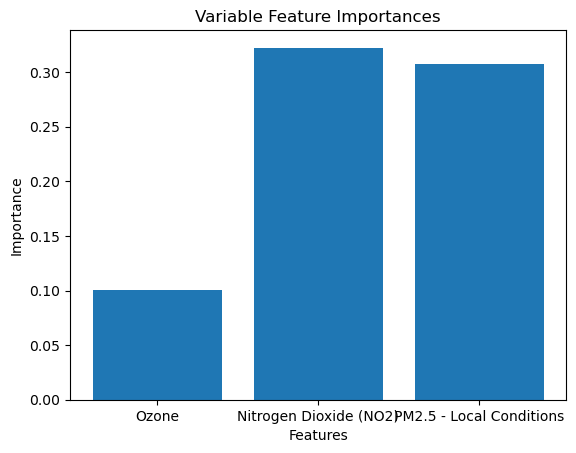

In [17]:
# Define the feature names
feature_names = ['Ozone', 'Nitrogen Dioxide (NO2)', 'PM2.5 - Local Conditions']

# Plot the bar chart
plt.bar(feature_names, AQS_mean)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Feature Importances')
plt.show()


In [18]:
# Read in Waves data
filename = "Waves_2023.txt"
file = pd.DataFrame(pd.read_csv(filename, delim_whitespace=True))
df = (file[['WVHT','APD','DPD','MWD','WTMP']].copy()).dropna()

X = np.column_stack((df['APD'],df['DPD'],df['MWD'],df['WTMP']))
y = df['WVHT'].to_numpy()

/var/folders/bm/1zbxfdz545vb2vms38bdffv80000gn/T/ipykernel_17173/759518785.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  file = pd.DataFrame(pd.read_csv(filename, delim_whitespace=True))


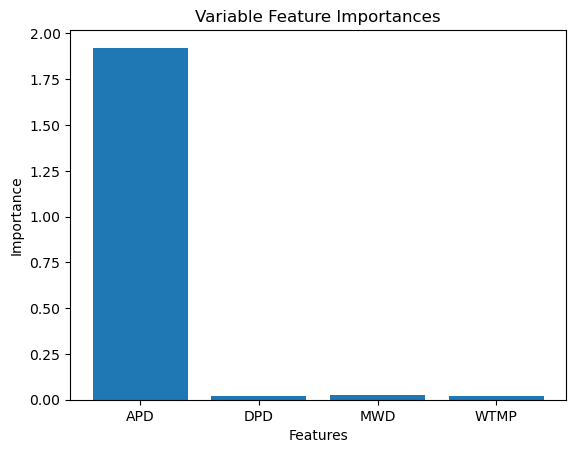

In [19]:
# XGBoost
bst = XGBRegressor(n_estimators=25, learning_rate=0.4, eval_metric='rmse')
bst = bst.fit(X, y)
result = permutation_importance(bst, X, y, n_repeats=10, random_state=0)
Waves_mean = result.importances_mean
Waves_std = result.importances_std

# Define the feature names
feature_names = ['APD', 'DPD', 'MWD', 'WTMP']

plt.bar(feature_names, Waves_mean)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Feature Importances')
plt.show()

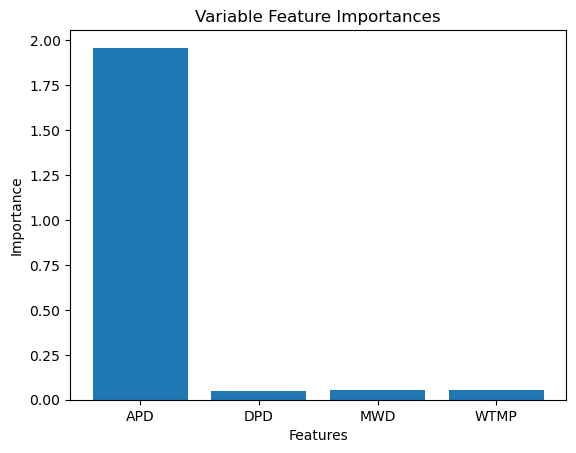

In [20]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor().fit(X,y)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)
Waves_mean = result.importances_mean
Waves_std = result.importances_std

plt.bar(feature_names, Waves_mean)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Feature Importances')
plt.show()

Text(0.5, 1.0, 'Variable Feature Importances')

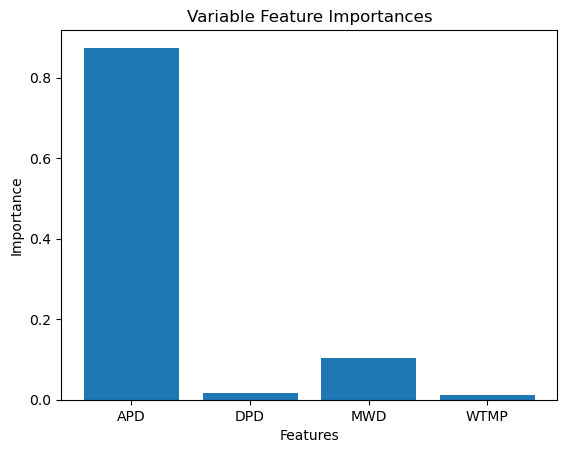

In [21]:
# Linear Regression
clf = linear_model.LinearRegression().fit(X,y)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)
Waves_mean = result.importances_mean
Waves_std = result.importances_std

plt.bar(feature_names, Waves_mean)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Variable Feature Importances')




In [ ]:
# The variable feature importance is different for each model. The XGBoost model has the highest importance for the APD feature, while the linear regression model has the highest importance for the WTMP feature. The decision tree model has the highest importance for the MWD feature. This shows that the importance of features can vary depending on the model used.